### Problem Statement

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce
the environmental impact of energy production increases.  

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies
worldwide.  
The U.S. Department of Energy has put together a guide to achieving operational efficiency using
predictive maintenance practices.  

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation
and future component capability.  
The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately 
and the component is replaced before it fails, the costs of operation and maintenance will be much lower.  

The sensors fitted across different machines involved in the process of energy generation collect data related
to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to
various parts of the wind turbine (gearbox, tower, blades, break, etc.).

#### Context and Objective

**“ReneWind”** is a company working on improving the machinery/processes involved in the production of wind. 
energy using machine learning and has collected data on generator failure of wind turbines using sensors.  
They have shared a ciphered version of the data, as the data collected through sensors is confidential (the 
type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set,  
and 5000 in the test set.  


The objective is to build various classification models, tune them, and find the best one that will help identify 
failures so that the generators can be repaired before failing/breaking to reduce the overall maintenance cost.  

The nature of predictions made by the classification model will translate as follows:
* **True positives (TP)** are failures correctly predicted by the model. These will result in repair costs.
* **False negatives (FN)** are real failures where there is no detection by the model. These will result in replacement costs.
* **False positives (FP)** are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of
inspection is less than the cost of repair.

**“1”** in the target variable should be considered as “failure” and **“0”** represents “No failure”
.

#### Data Description


The data provided is a transformed version of the original data which was collected using sensors.
* **Train.csv** - To be used for training and tuning of models.
* **Test.csv** - To be used only for testing the performance of the final best model.

Both datasets consist of 40 predictor variables and oen target variable.

### Install important libraries

In [ ]:
# Installing the libraries with the specified version
# Installing the libraries with the specified version
!pip install tensorflow==2.13.0 scikit-learn==1.3.2 matplotlib==3.7.5 seaborn==0.13.2 numpy==1.24.3 pandas==2.0.3 -q --no-warn-script-location

### Import libraries

In [5]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
from scipy.stats import zscore
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
# For setting seeds during random number generation
import random
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score, fbeta_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Define a consistent seed
SEED_VALUE = 812

# Set the seed for reproducibility
np.random.seed(SEED_VALUE) # For NumPy operations
random.seed(SEED_VALUE)    # For Python's built-in random module

# Set the seed using keras.utils.set_random_seed. This will set:
tf.keras.utils.set_random_seed(SEED_VALUE)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

### Data Overview

#### Loading Data

In [7]:
# Reading the training dataset.
train_data = pd.read_csv('Train.csv')

# Reading the testing dataset
test_data = pd.read_csv("Test.csv")

In [8]:
# Keep a copy of the data to avoid reloading if needed
data_copy = train_data.copy()

* We are provided separate train and test dataset
* We will use the train dataset for training/validation of the model and test dataset to test the model


#### Displaying the first few rows of the dataset

In [9]:
# Let's view the first 5 rows of the data
train_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


#### Displaying the last few rows of the dataset

In [10]:
# Let's view the last 5 rows of the data
train_data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071318,-1.088279,-0.796174,-3.011720,-2.287540,2.807310,0.481428,0.105171,-0.586599,-2.899398,...,-8.273996,5.745013,0.589014,-0.649988,-3.043174,2.216461,0.608723,0.178193,2.927755,1
19996,2.890264,2.483069,5.643919,0.937053,-1.380870,0.412051,-1.593386,-5.762498,2.150096,0.272302,...,-4.159092,1.181466,-0.742412,5.368979,-0.693028,-1.668971,3.659954,0.819863,-1.987265,0
19997,-3.896979,-3.942407,-0.351364,-2.417462,1.107546,-1.527623,-3.519882,2.054792,-0.233996,-0.357687,...,7.112162,1.476080,-3.953710,1.855555,5.029209,2.082588,-6.409304,1.477138,-0.874148,0
19998,-3.187322,-10.051662,5.695955,-4.370053,-5.354758,-1.873044,-3.947210,0.679420,-2.389254,5.456756,...,0.402812,3.163661,3.752095,8.529894,8.450626,0.203958,-7.129918,4.249394,-6.112267,0
19999,-2.686903,1.961187,6.137088,2.600133,2.657241,-4.290882,-2.344267,0.974004,-1.027462,0.497421,...,6.620811,-1.988786,-1.348901,3.951801,5.449706,-0.455411,-2.202056,1.678229,-1.974413,0


#### Checking the shape of the dataset

In [11]:
train_data.shape

(20000, 41)

In [12]:
test_data.shape

(5000, 41)

* training data has 20000 data points and 41 features.
* testing data has 5000 data points and 41 features.

#### Checking the data types of the columns of the dataset

In [13]:
# Let's check the datatypes of the columns in the dataset
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

* Missing observations in V1 and V2
* Only 18 rows are missing across each column which is less than 5% of entire data
* All columns are float except the target variable which is int

#### Checking for duplicate values

In [14]:
# Let's check for duplicate values in the data
train_data.duplicated().sum()

np.int64(0)

* There are no duplicated rows in the data

#### Target class distribution

In [15]:
train_data.Target.value_counts()

Target
0    18890
1     1110
Name: count, dtype: int64

* There is a severe class imbalance between the two classes.
* We have only 5.55% data points from positive class.
* We could use class weights or techniques like SMOTE to handle this imbalance.

#### Unique Value check

In [16]:
# Let's check the number of unique values in each column
train_data.nunique()

V1        19982
V2        19982
V3        20000
V4        20000
V5        20000
V6        20000
V7        20000
V8        20000
V9        20000
V10       20000
V11       20000
V12       20000
V13       20000
V14       20000
V15       20000
V16       20000
V17       20000
V18       20000
V19       20000
V20       20000
V21       20000
V22       20000
V23       20000
V24       20000
V25       20000
V26       20000
V27       20000
V28       20000
V29       20000
V30       20000
V31       20000
V32       20000
V33       20000
V34       20000
V35       20000
V36       20000
V37       20000
V38       20000
V39       20000
V40       20000
Target        2
dtype: int64

* All rows are unique across the entire dataset
* Target variable has two values(0,1)

#### Statistical summary of data

In [17]:
# Let's view the statistical summary of the numerical columns in the data
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


**Observations**
* The dataset contains 20,000 observations for each of the 40 variables (V1 to V40) and the target variable.
* The target variable has a mean of 0.0555 and a standard deviation of 0.228959.
* The means of the variables (V1 to V40) range from -3.611252 (V21) to 2.229620 (V35).
* The standard deviations are relatively high, ranging from 1.651547 (V22) to 5.500400 (V32), indicating that the data points for these variables are quite spread out.
* The minimum and maximum values for each variable vary widely, suggesting that the data is not normalized and has a large range.
* The high standard deviations and the differences between the mean and median suggest that some variables may be skewed.
* The presence of outliers can be inferred from the large differences between the minimum and maximum values and the interquartile range (IQR).

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

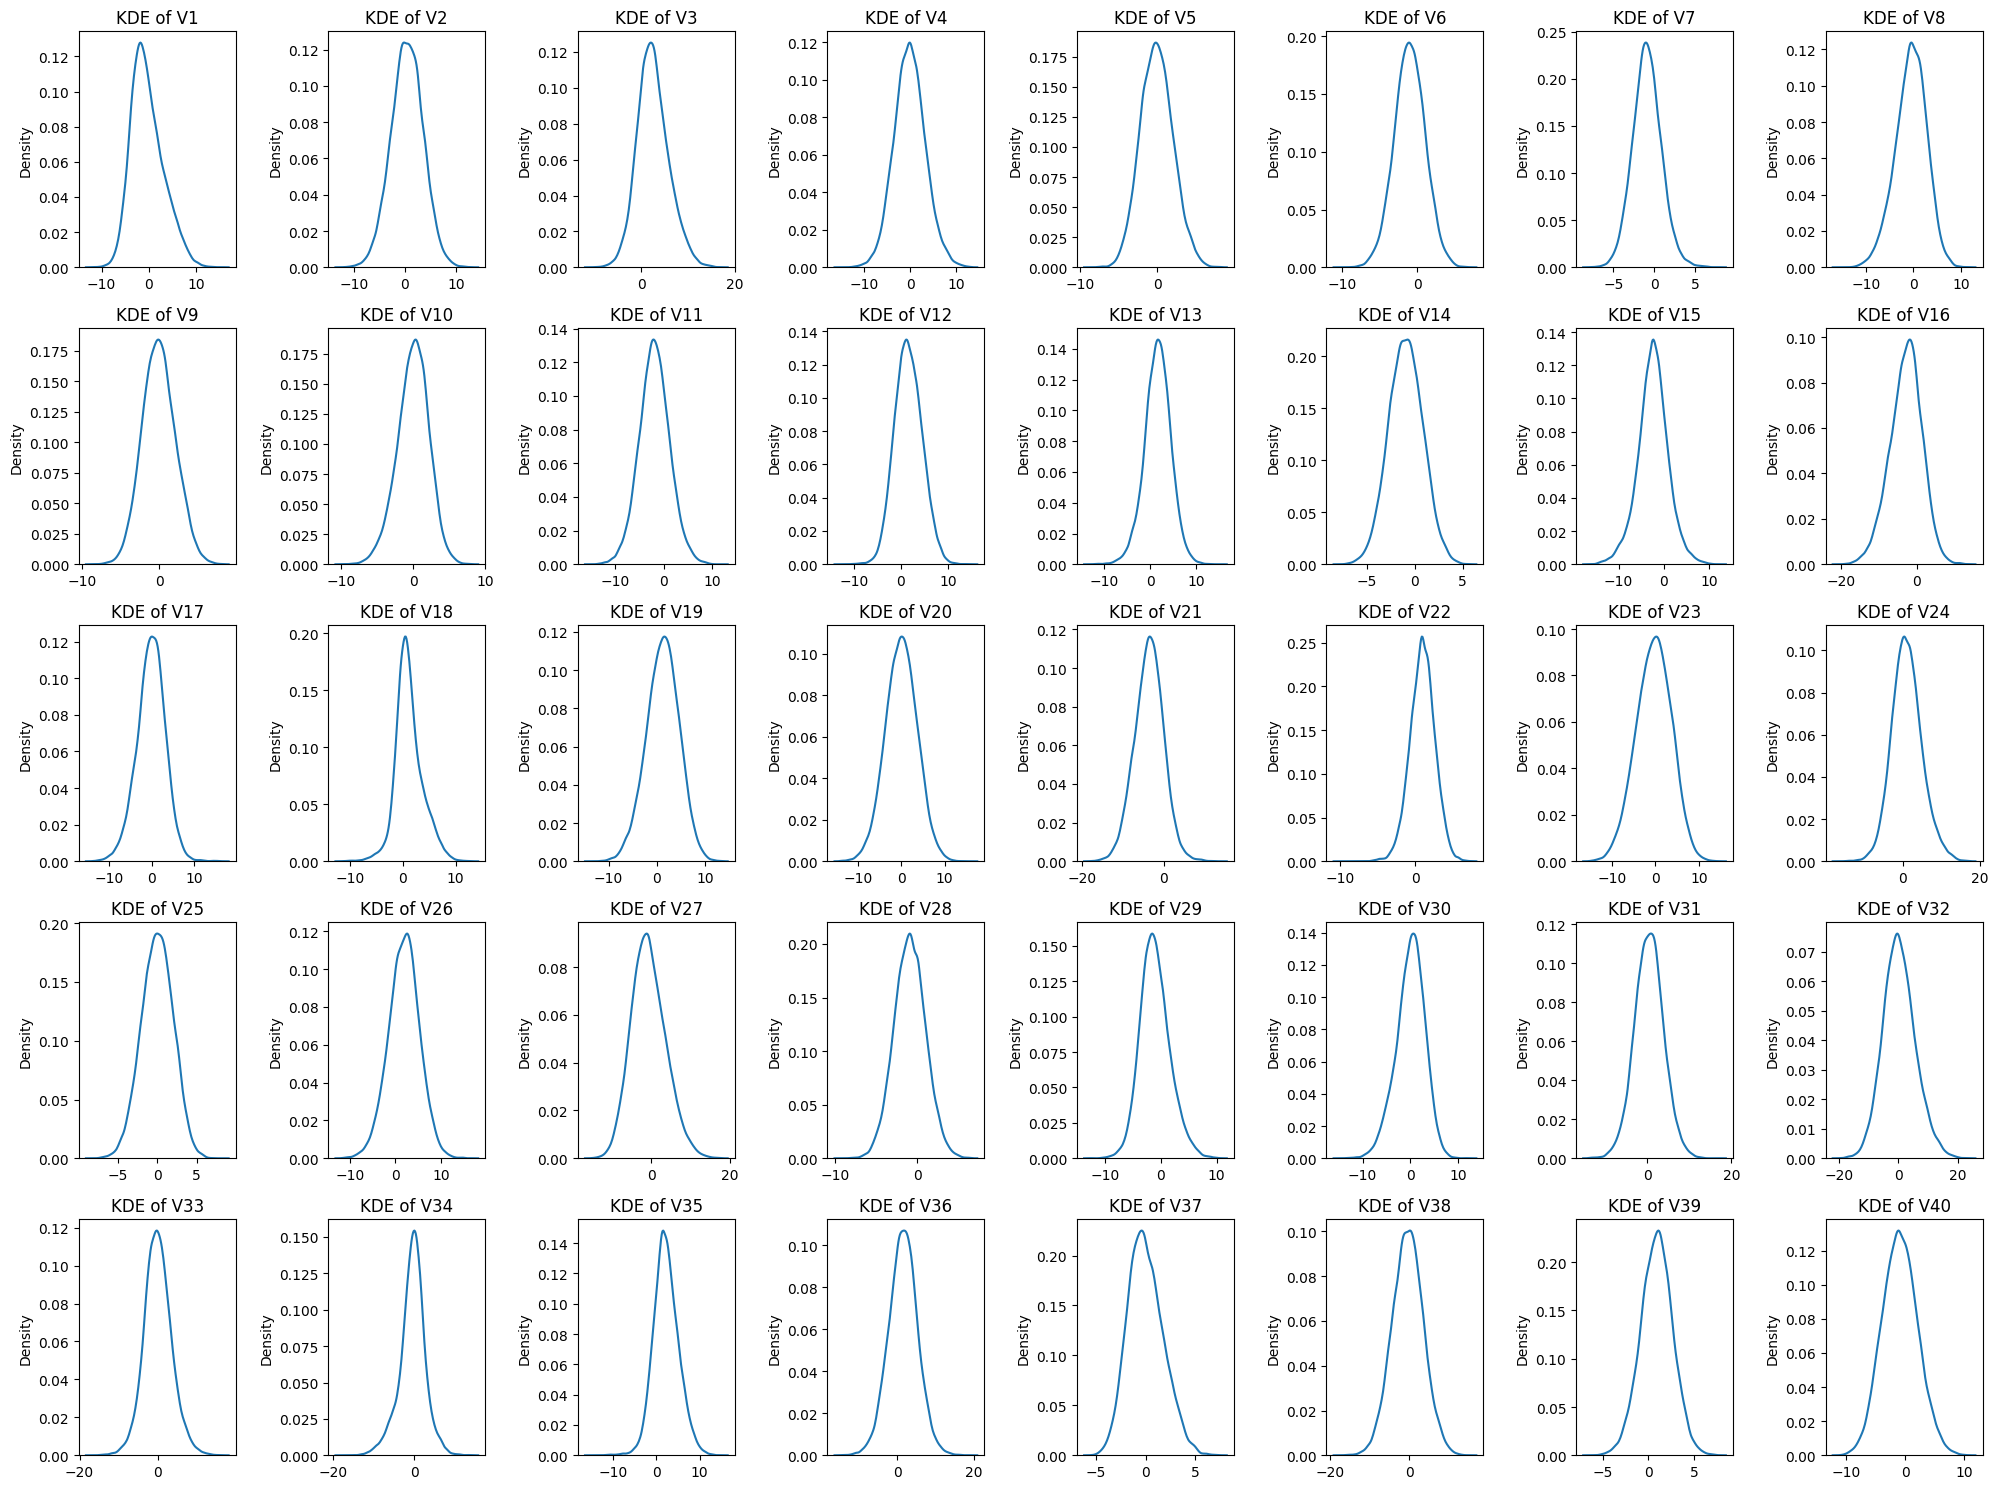

In [18]:
# Create a 5x8 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(20, 15))

num_features = train_data.shape[1] - 1    #Exclude the target column

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and plot its KDE
for i, feature in enumerate(train_data.columns[:num_features]):
    sns.kdeplot(train_data[feature], ax=axes[i])
    axes[i].set_title(f'KDE of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Remove any unused subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

**Observations**
* Most features are centered near 0, with roughly symmetric, bell-shaped distribution shapes suggesting:
    * Likely some form of pre-normalized feature set.
    * Raw magnitude of values is not meaningful, focus should remain on shape, spread, and outliers.

* While many variables share a similar central tendency, there is noticeable variability in their spread (variance). For instance, variables like V7, V14, V22, V25, and V39 show relatively narrow distributions, implying low variance, whereas variables such as V3, V16, V27, V32, V36, and V38 exhibit wider spreads, indicating higher variance.


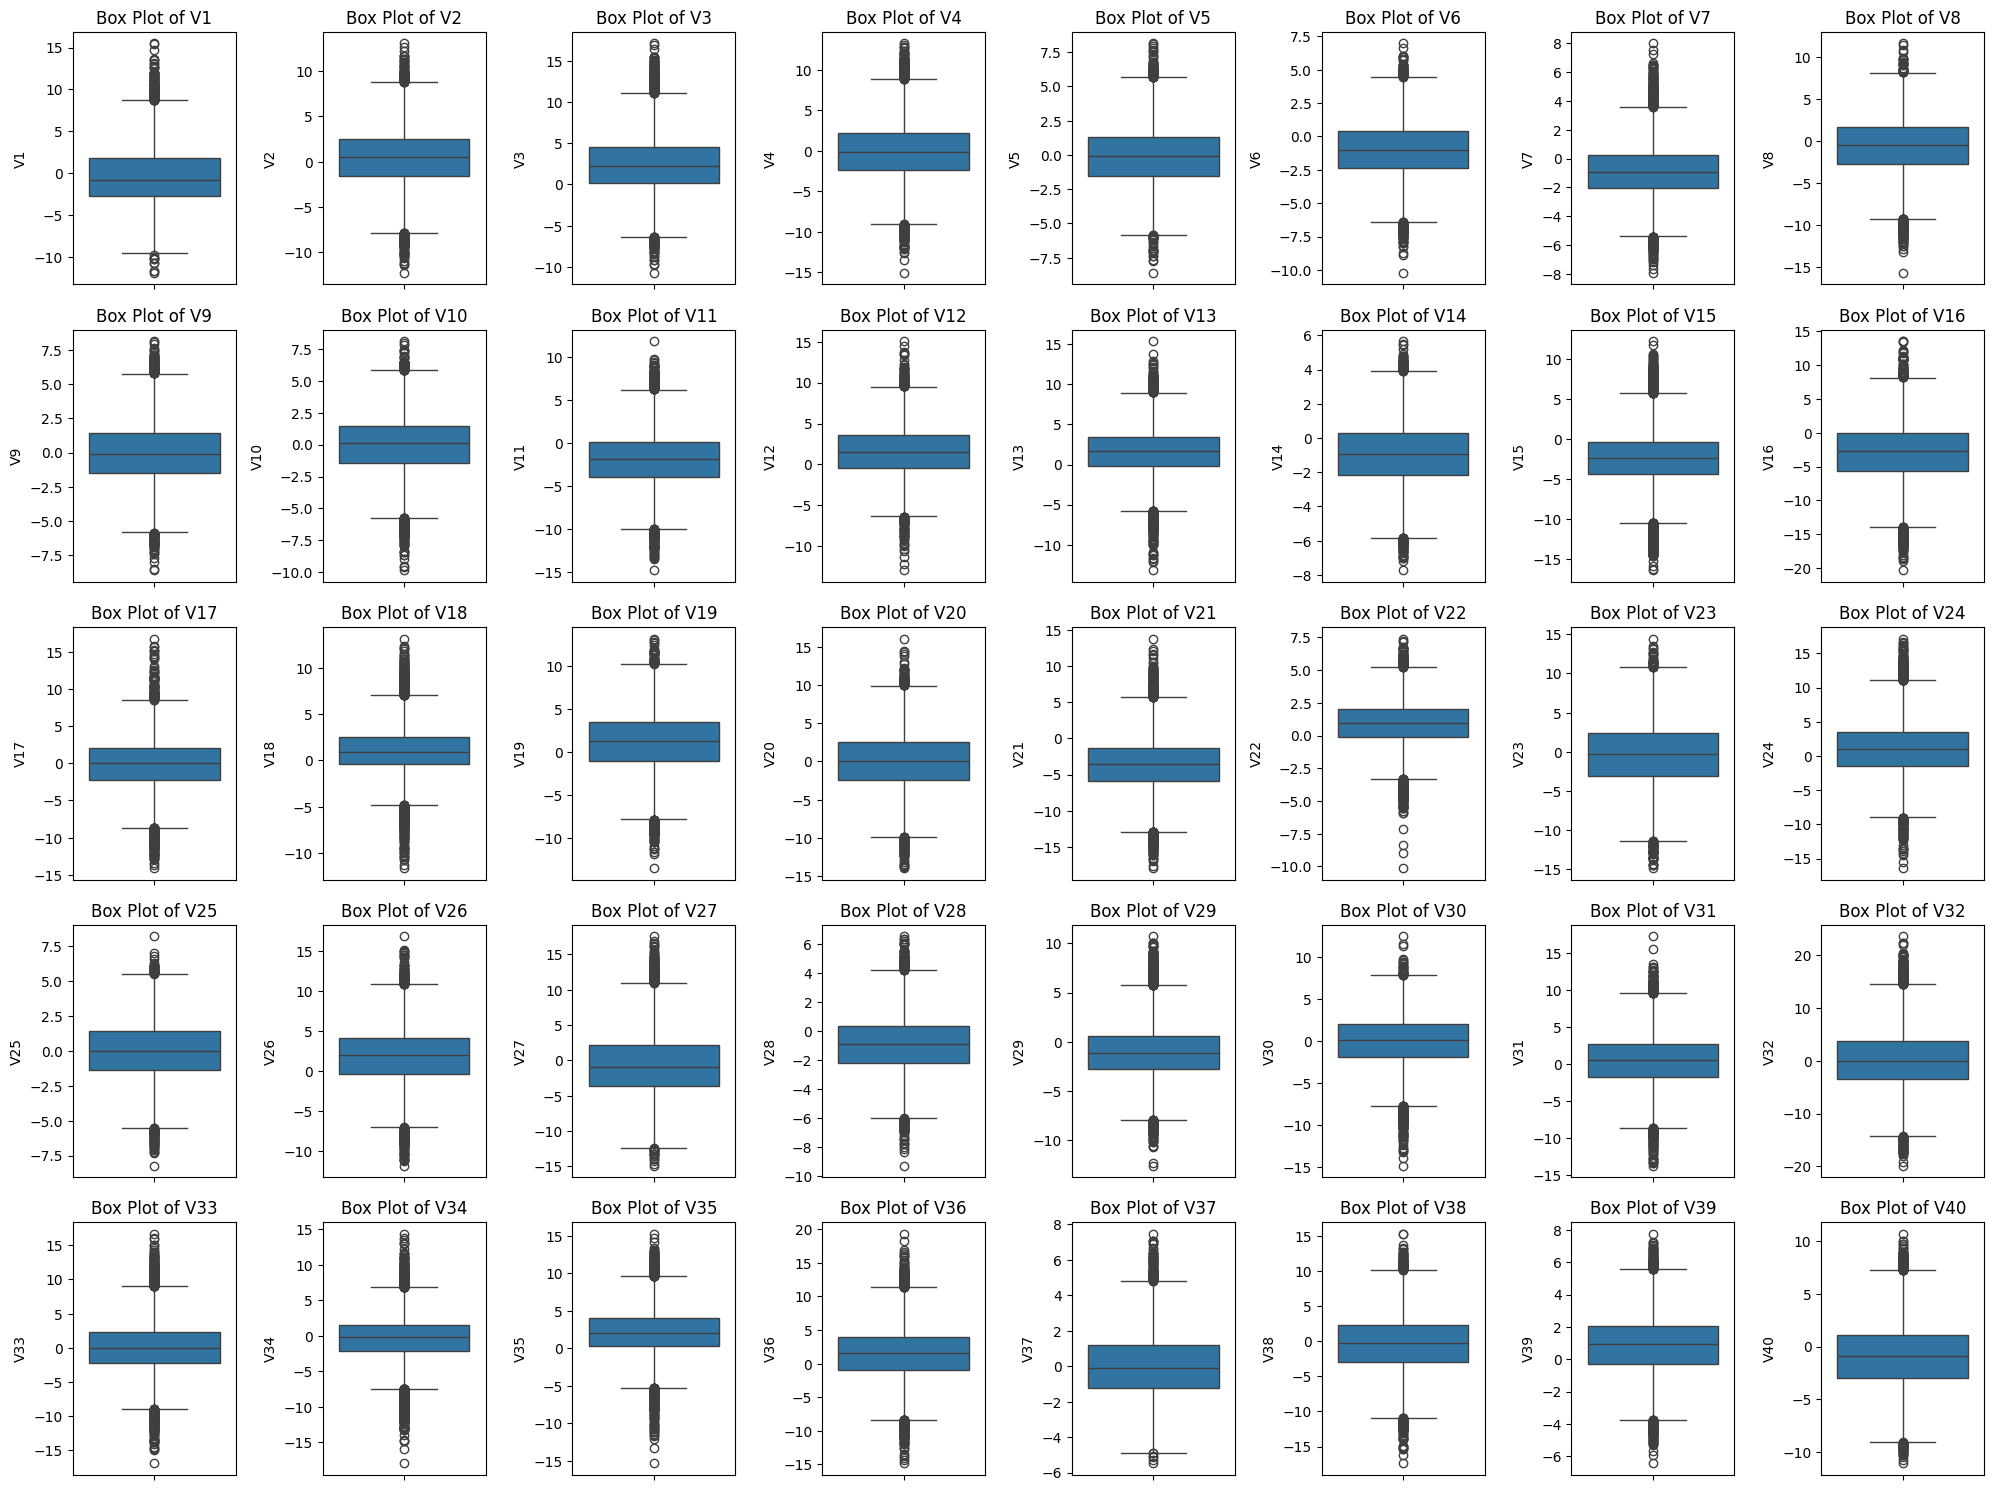

In [19]:

# Create a 5x8 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(20, 15))

num_features = train_data.shape[1] - 1    #Exclude the target column

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and plot its box plot
for i, feature in enumerate(train_data.columns[:num_features]):
    sns.boxplot(y=train_data[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel('')

# Remove any unused subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

**Observations**
* Most variables (especially V1–V4, V8, V11–V12, V18, V21, V26, V27, V30–V36) show numerous outliers, on both ends or skewed to one side.
    * This could mean
        * Possibly anomalous class in data (common in fault detection).
        * These outliers could carry strong signal (not necessarily noise).

* Variables with wide interquartile range (IQR) and large spread: V1, V4, V8, V11, V21, V26, V27, V31, V35, V36
    * These features have significant data dispersion, likely holding higher information content.
    * Should be prioritized in modeling and regularization strategies.

* Low Variance / Flat Features
    * V25, V37, V38, V40 have narrow boxes, i.e. low IQR and low variance
    * V25 looks almost constant, likely uninformative, may be dropped.

* Some features are noticeably skewed:
    * V14, V18, V22, V26, V36 exhibit right or left skew
    * Skew may indicate anomalous behavior in one class


#### Bivariate Analysis

Number of features: 40


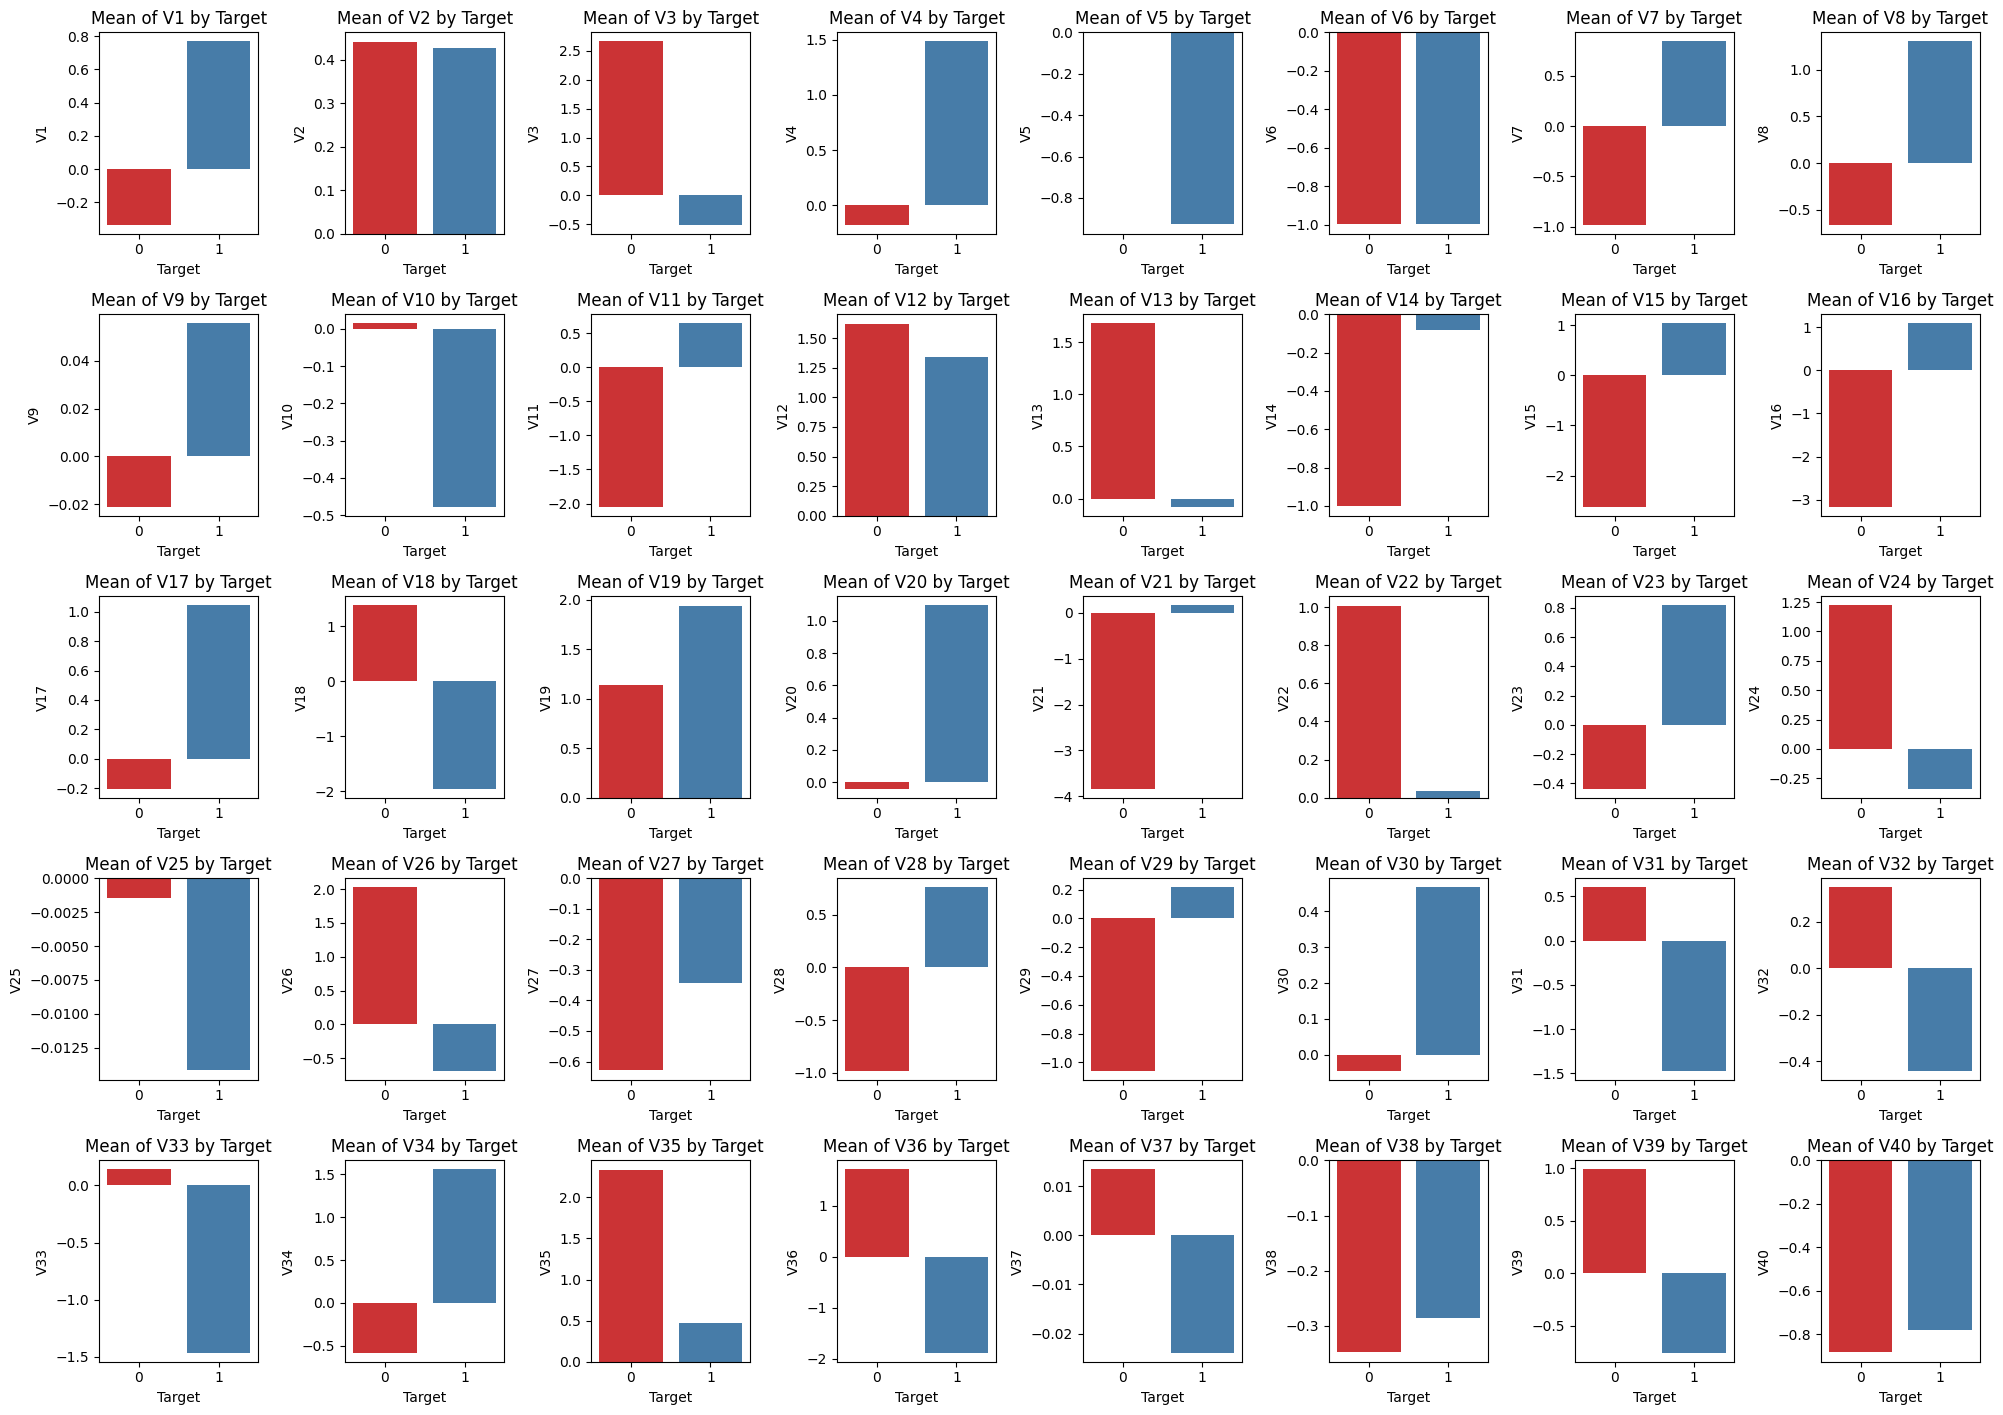

In [20]:
# Number of features (excluding the target column)
num_features = len(train_data.columns) - 1

# Print the number of features
print(f"Number of features: {num_features}")

# Check if num_features is greater than 0
if num_features <= 0:
    raise ValueError("Number of features must be greater than 0.")

# Calculate appropriate grid dimensions
num_rows = (num_features + 7) // 8  # Ensure enough rows to accommodate all features
num_cols = 8

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15 * (num_rows / 5)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define colors for each class
colors = sns.color_palette('Set1')

# Loop through each feature and plot its contribution to each target class
for i, feature in enumerate(train_data.columns[:-1]):  # Exclude the target column
    # Group by target and calculate mean of the feature
    grouped = train_data.groupby('Target')[feature].mean().reset_index()
    
    # Plot bar plot
    sns.barplot(x='Target', y=feature, data=grouped, ax=axes[i], palette=colors)
    axes[i].set_title(f'Mean of {feature} by Target')
    axes[i].set_xlabel('Target')
    axes[i].set_ylabel(feature)

# Remove any unused subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to make space for the legend

# Create a common legend
handles, labels = axes[0].get_legend_handles_labels()
if handles and labels:  # Ensure there are handles and labels to create a legend
    fig.legend(handles, labels, loc='upper center', ncol=len(labels), title='Target Classes')

# Display the plot
plt.show()

**Observations**
* Strongly Discriminative Features (high separation between classes): V1, V3, V4, V8, V10, V11, V14, V15, V18, V21, V22, V26, V27, V31, V33, V35, V36
    * Observing large mean differences between target classes hence these variables likely carry high predictive power.


* Moderately Discriminative Features: V2, V5, V6, V7, V13, V16, V17, V19, V20, V23, V24, V28, V29, V30, V32, V34, V39, V40
    * Among these features, some separation is visible, but it is less sharp. May still contribute in combination with other features.


* Low/No Discriminative Power: V9, V12, V25, V37, V38
    * Among these features, very minimal or no visible mean difference. Might be less useful individually or possibly noise.


* V1, V3, V4 show stark contrast making them top candidates for univariate modeling and inspection.
* Features like V21, V22, V26, V35, V36 show directionally opposite means which could be excellent for classification.


In [21]:
def plot_distribution_of_continuous_features(data, features, target):
    """
    Plot the distribution of continuous features with respect to the target variable.

    Parameters:
    data (pandas.DataFrame): The input dataset.
    features (list): List of continuous features to plot.
    target (str): The target variable.

    Returns:
    None
    """
    num_cols = len(features)
    num_rows = (num_cols + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

    for i, feature in enumerate(features):
        row = i // 2
        col = i % 2

        ax = axes[row, col]

        sns.histplot(data=data, x=feature, hue=target, kde=True, ax=ax)
        ax.set_title(f"Distribution of {feature} by {target}")

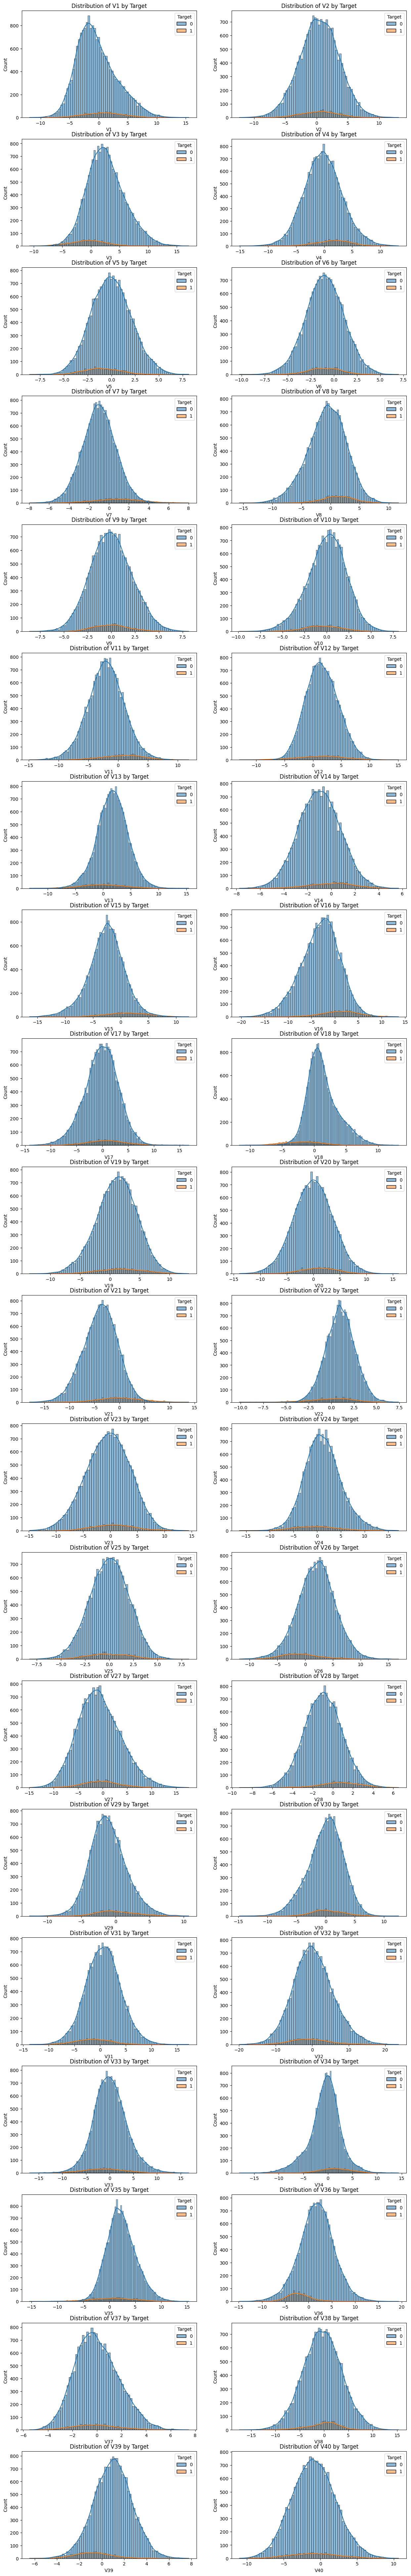

In [22]:
plot_distribution_of_continuous_features(train_data, train_data.select_dtypes('float64').columns.tolist(), 'Target')

**Observations**
* Highly Distinctive Features (significantly different class-wise distribution shape, center, or tails): V1, V3, V4, V8, V10, V11, V14, V18, V21, V22, V26, V27, V31, V35, V36
    * Class 1 and Class 0 have shifts in central tendency or noticeable shape asymmetries.
    * These are very strong predictors and should be emphasized in modeling and feature selection.
    * Example: V1, V4, V8 show clear mean shifts; V21 and V26 have skew differences.


* Moderately Differentiated Features (overlapping but slight shift or variance change): V2, V5, V7, V13, V15, V16, V17, V19, V20, V24, V28, V29, V30, V32, V33, V34, V39
    * Some separation is visible (often in tails or center), may be more powerful in combination or after transformation.
    * V13 and V24 show variance differences, while V32–V34 exhibit subtle tail divergence.


* Weak or Non-Discriminative Features (almost identical distributions): V6, V9, V12, V23, V25, V37, V38, V40
    * Distributions for both classes almost perfectly overlap, likely not useful alone.
    * Consider dropping or combining them with others if correlation exists.

* Class 1 is underrepresented (fewer samples), KDE lines for class 1 are noisier which underscores need for class imbalance handling.
* Most variables are centered around 0 with Gaussian like shapes, suggesting prior PCA or standardized transformation was applied (common in anonymized datasets like fault detection).
* A few features (e.g., V36, V26) show distribution flipping or extreme value shifts, often indicative of failure vs normal.


#### Correlation analysis

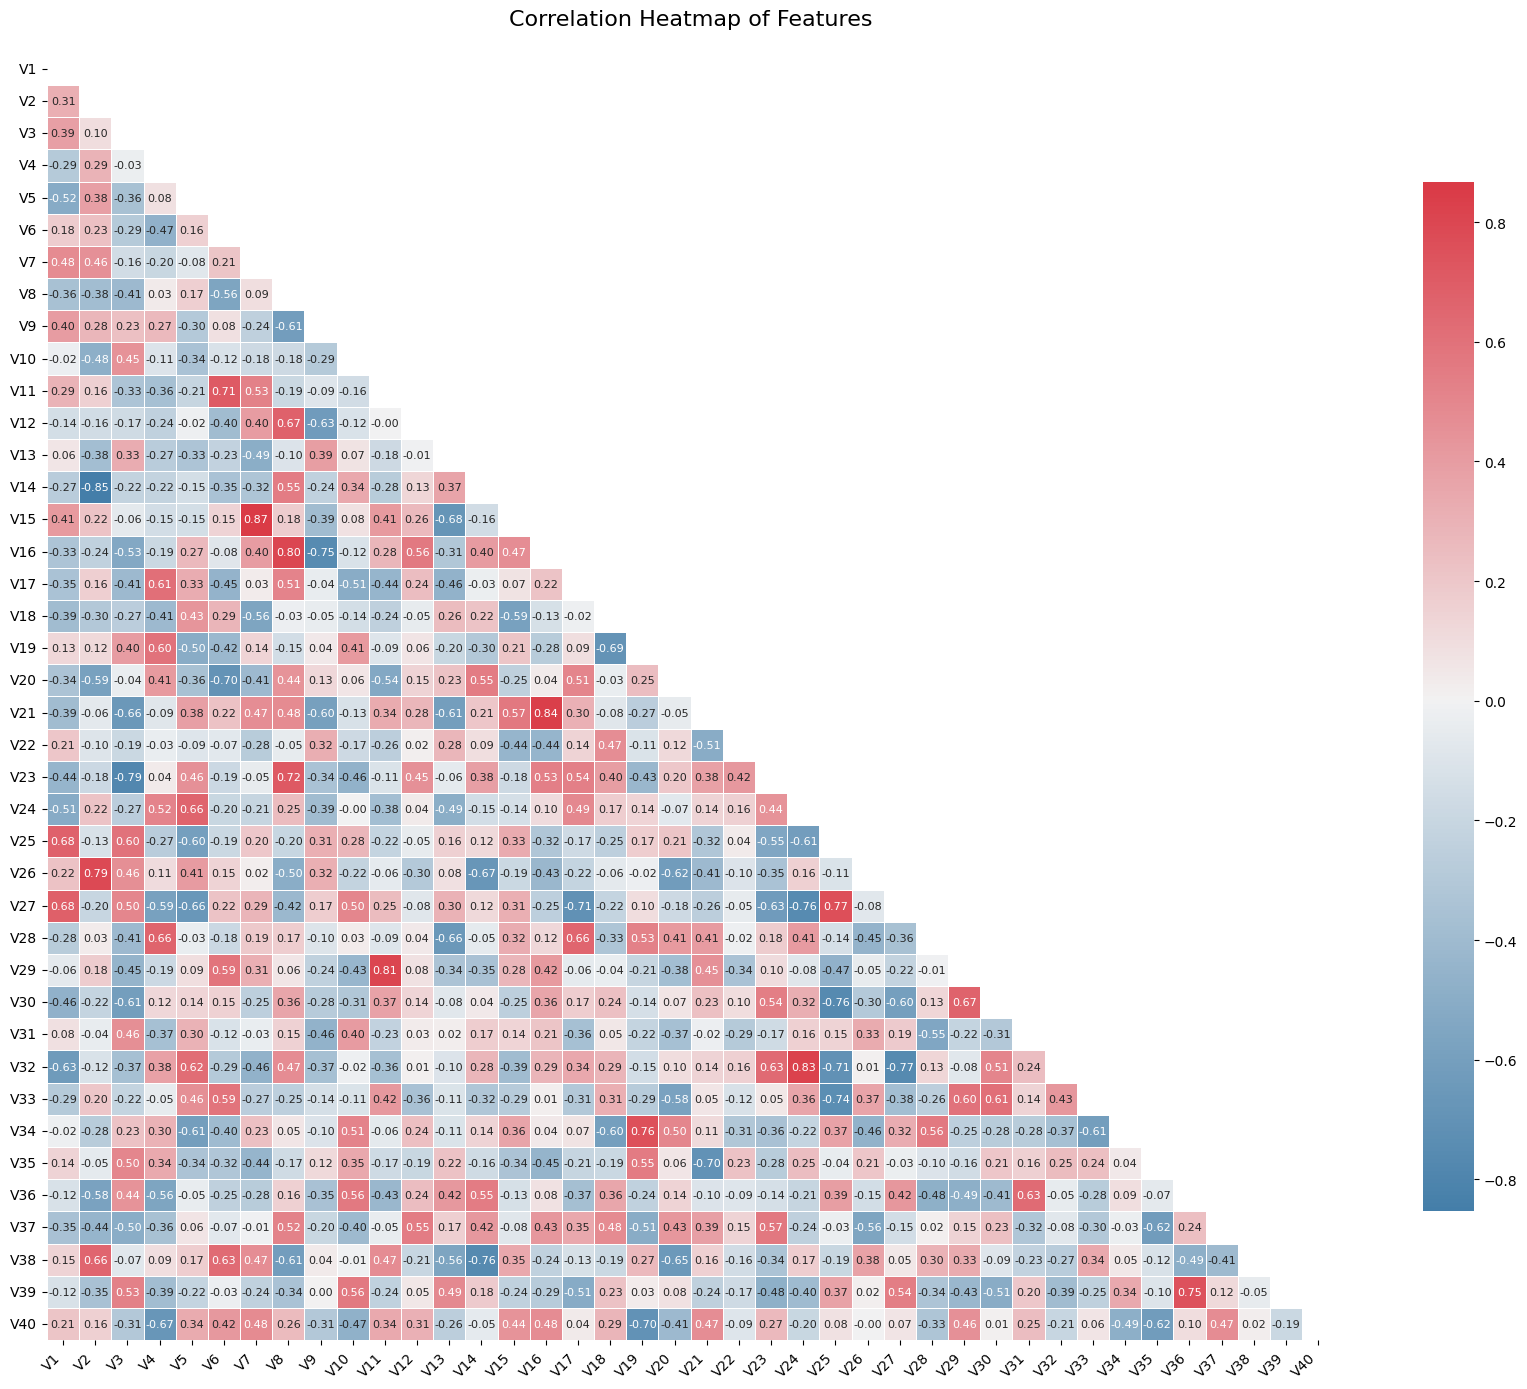

In [23]:

features_only = train_data.drop(columns=['Target']) if 'Target' in train_data.columns else train_data

# Calculate correlation matrix
corr_matrix = features_only.corr(method='pearson')

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Custom diverging color palette
cmap = sns.diverging_palette(240, 10, as_cmap=True)  # soothing blue-red

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)

plt.title("Correlation Heatmap of Features", fontsize=16, pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


**Observations**
* Based on the correlation heatmap, there are many columns with strong correlations (absolute correlation coefficient >= 0.7)
which means there is redundancy in data.

* Highly correlated features (e.g., V7-V15, V29-V11) indicate redundancy, which can lead to multicollinearity issues, making the FCNN less stable and potentially harder to interpret.

* Strong correlations suggest opportunities for feature selection (removing one of the highly correlated features) or engineering new features based on these relationships (e.g., principal component analysis) to potentially simplify the model and improve performance.

* The presence of significant correlations underscores the importance of proper data scaling and normalization (e.g., z-score normalization) before feeding features into an FCNN to ensure stable training and faster convergence.

* Highly correlated features can lead to a "zig-zagging" effect during gradient descent, slowing down convergence. Addressing these correlations can lead to a more efficient training process.


### Data PreProcessing

#### Missing Value handling

In [24]:
# Calculating the total number of nan values for each column.
# Exclude the Target column as it is the label column
train_data.select_dtypes("float64").isnull().sum()

V1     18
V2     18
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
V10     0
V11     0
V12     0
V13     0
V14     0
V15     0
V16     0
V17     0
V18     0
V19     0
V20     0
V21     0
V22     0
V23     0
V24     0
V25     0
V26     0
V27     0
V28     0
V29     0
V30     0
V31     0
V32     0
V33     0
V34     0
V35     0
V36     0
V37     0
V38     0
V39     0
V40     0
dtype: int64

In [25]:
# Identifying the class distribution for rows with missing values
temp_df = train_data[['V1','V2','Target']]
temp_df = temp_df[temp_df['V1'].isnull() | temp_df['V2'].isnull()]
temp_df["Target"].value_counts()

Target
0    36
Name: count, dtype: int64

* Missing observations in V1 and V2
* Only 36 rows are have missing values which is less than 5% of entire data
* All missing values belong to class 0 (majority class), so we can safely drop them

In [26]:
# Droping rows with NaN values
train_data = train_data.dropna()

In [27]:
train_data.shape

(19964, 41)

* We dropped 36 rows which means different rows in V1 and V2 column had NaN values.
* We have 19964 data points in training dataset after dropping missing value rows.

#### Outlier Handling

* Z-score helps to identify values that are more than 3 standard deviations away from the mean.
* Data points with a z-score greater than 3 (or less than -3) are considered outliers because they lie outside the range where 99.7% of the data is expected to fall. 
* These outliers could represent noise or errors in the data.


In [28]:
# Separate features and target
X_train = train_data.drop(columns=['Target'])
y_train = train_data['Target']

In [29]:
# Compute Z-scores
z_scores = X_train.apply(zscore)

# Identify outliers (any feature > threshold)
outlier_mask = (z_scores.abs() > 3).any(axis=1)

# Class-wise counts
print("Total samples:", len(X_train))
print("Outliers removed:", outlier_mask.sum())
print("Outliers from Class 1 (positive):", y_train[outlier_mask].sum())
print("Outliers from Class 0 (negative):", len(y_train[outlier_mask]) - y_train[outlier_mask].sum())

# Percentage lost from each class
pos_lost_pct = y_train[outlier_mask].sum() / y_train.sum() * 100
neg_lost_pct = (len(y_train[outlier_mask]) - y_train[outlier_mask].sum()) / (len(y_train[y_train == 0])) * 100

print(f"Positive class loss due to outlier removal: {pos_lost_pct:.2f}%")
print(f"Negative class loss due to outlier removal: {neg_lost_pct:.2f}%")


Total samples: 19964
Outliers removed: 1823
Outliers from Class 1 (positive): 379
Outliers from Class 0 (negative): 1444
Positive class loss due to outlier removal: 34.14%
Negative class loss due to outlier removal: 7.66%


* Most outliers are from Class 1, removing them hurts recall and removes critical signal.
* This will significantly reduce the data points for class 1 which is already severly imbalanced.


In [30]:
# Add IsOutlier flag and OutlierScore as a feature
#* We will use the outliers intelligently by adding "OutlierScore" as a Feature, 
# this can help NN to learn that "being far from center" correlates with positive class.
#train_data['IsOutlier'] = outlier_mask
#train_data['IsOutlier'] = train_data['IsOutlier'].astype(int)
#train_data['OutlierScore'] = z_scores.abs().max(axis=1)

In [31]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40'],
      dtype='object')

* Removing outliers without considering the target can destroy the very minority class you're trying to predict. 
* In imbalanced datasets, outliers are possibly a signal for the minority class.

#### Data Normalization

In [32]:
# Normalize the data (mean = 0, std = 1)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(X_train)

# Convert back to a DataFrame for easier handling
X_train = pd.DataFrame(normalized_data, columns=X_train.columns)

#### Train and Validation Split

In [33]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [34]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)

(15971, 40) (15971,)
(3993, 40) (3993,)


#### Preparing test data

In [35]:
# Separate features and target for the test dataset
X_test=test_data.drop(columns=['Target'])
y_test=test_data['Target']

In [36]:
# Scale the test data using same scaler as used for training data
X_test_scaled = scaler.transform(X_test)

In [37]:
X_test_scaled.shape

(5000, 40)

In [38]:
y_test.shape

(5000,)

* Test data has 5000 observations.
* Test data was scaled using same scaler as training data
* We did nor add any new features or remove outliers from training data, so no additional processing needed on test data
* We will not touch test data till we decide on final model to make predictions.

### Model Building

#### Model Evaluation Criteria

**A model can make wrong predictions in the following ways:**
* Predicting no failure when a failure infact happens(False Negative). These will result in replacement costs.
* Predicting a failure when there is none (False positive). These will result in inspection costs.



**Which case is more important?**

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of
inspection is less than the cost of repair. So, we definitely need to prioritize maximizing the recall i.e. reducing
negatives, since replacement costs are highest. But too many inspections also incur a cost i.e. False positives, so
while we try to maximize recall, we definitely need to balance the precision as well. This will help avoid costly 
replacements while minimizing unnecessary inspections

**How to reduce this loss i.e need to reduce False Negatives ?**

Since recall needs to be prioritized, F2 Score evaluation metric should be used which weighs recall 
more heavily than precision.

We will also use recall of class 1 (failure class) instead of weighted average to have a clear understanding
of how good recall is for failure class and not have a biased picture due to high recall on negative class.


#### Utility Functions

In [39]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.


def evaluate_thresholds(y_true, y_probs, beta=2):
   best_thresh = 0.5
   best_fbeta = 0
   for thresh in np.arange(0.05, 0.95, 0.01):
       y_pred = (y_probs >= thresh).astype(int)
       recall = recall_score(y_true, y_pred)
       precision = precision_score(y_true, y_pred)
       fbeta = fbeta_score(y_true, y_pred, beta=beta)
       if fbeta > best_fbeta:
           best_fbeta = fbeta
           best_thresh = thresh
       #print(f"Threshold: {thresh:.2f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F{beta}: {fbeta:.3f}")
   print(f"\n Best Threshold: {best_thresh:.2f} with F{beta}: {best_fbeta:.3f}")
   return best_thresh


# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    pred = model.predict(predictors)  # get predicted probabilities
    best_threshold = threshold
    if threshold == 0.5:
        best_threshold = evaluate_thresholds(target, pred, beta=2)

    # checking which probabilities are greater than threshold
    pred = (pred >= best_threshold).astype(int)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, pos_label=1)  # recall for failure class
    #recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score
    f2 = fbeta_score(target, pred, beta=2)  # Compute F2-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,"F2 Score": f2,},
        index=[0],
    )

    return df_perf

In [40]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

* As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

In [41]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.058874229264735), 1: np.float64(17.98536036036036)}

* Class 1 has been assigned almost 17 times weight compared to class 0. 
* This means that the model will be penalized more for misclassifying class 1 than class 0.

#### Base Model

- Let's start with a neural network consisting of
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [315]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [316]:
#Initializing the neural network
model_0 = Sequential()
model_0.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_0.add(Dense(7,activation="relu"))
model_0.add(Dense(1,activation="sigmoid"))
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [317]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_0.compile(loss='binary_crossentropy', optimizer=optimizer)

# Define the EarlyStopping callback
# It monitors 'val_loss'
# 'patience=10' means it will wait for 5 epochs after the last improvement before stopping
# 'restore_best_weights=True' means it will restore the model weights from the epoch with the best monitored value
early_stopping = EarlyStopping(
    monitor='val_loss', # Metric to monitor (validation loss)
    patience=5,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

In [318]:
start = time.time()
history = model_0.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, 
                    epochs=epochs,class_weight=cw_dict,callbacks=[early_stopping], shuffle=False)
end=time.time()

Epoch 1/25
149/250 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 1.5998

2025-07-13 22:42:57.074108: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-07-13 22:42:57.074438: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 1.3903 - val_loss: 0.3975
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.7371 - val_loss: 0.2946
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.6434 - val_loss: 0.2474
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.5941 - val_loss: 0.2249
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.5582 - val_loss: 0.2083
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.5302 - val_loss: 0.1943
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.5115 - val_loss: 0.1845
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.4972 - val_loss: 0.1758
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.4854 - val_loss: 0.1720
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.4745 - val_loss: 0.1683
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.4666 - val_loss: 0.1656
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 

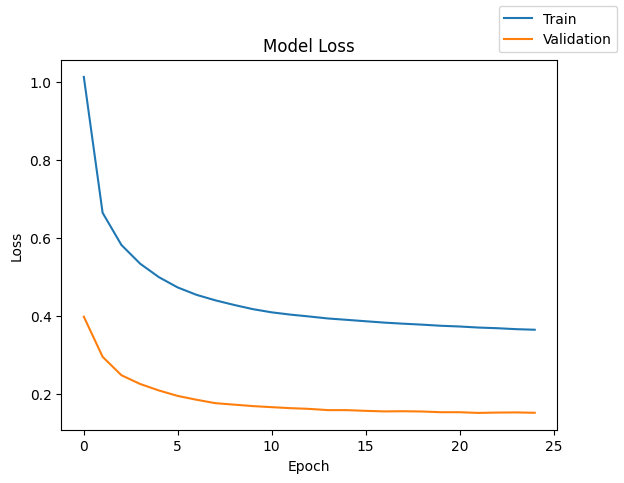

In [319]:
plot(history,'loss')

In [320]:
model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step

 Best Threshold: 0.82 with F2: 0.868


,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.985599,0.865991,0.98554,0.985568,0.867554


In [321]:
model_0_valid_perf = model_performance_classification(model_0, X_valid, y_valid, threshold=0.82)
model_0_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step


2025-07-13 22:43:07.173841: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:43:07.174222: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.986727,0.896396,0.986946,0.986824,0.890779


* Base model performs reasonably well but F2 score is low compared to other metrics indicating room for increase in recall.
* Training loss decreased steadily indicating that model is learning effectively.
* Train F2 score of ~0.87 and validation F2 score of ~0.89 indicate consistent performance of the model between training and testing datasets.

#### Model 1

* For base model, after the 10th epoch, the model's rate of learning is very low.
* Let's try adding momentum to check whether it's accelerating the learning process.
- Try neural network consisting of
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - SGD with momentum(0.9) as the optimizer

In [322]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [397]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_1.add(Dense(7,activation="relu"))
model_1.add(Dense(1,activation="sigmoid"))

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [398]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model_1.compile(loss='binary_crossentropy', optimizer=optimizer)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Metric to monitor (validation loss)
    patience=5,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

In [399]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, 
                    epochs=epochs,class_weight=cw_dict,callbacks=[early_stopping])
end=time.time()

Epoch 1/25


139/250 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 1.1630 

2025-07-13 22:48:47.045464: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-07-13 22:48:47.045850: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 1.0254 - val_loss: 0.3419
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.5214 - val_loss: 0.3055
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.4597 - val_loss: 0.2827
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.4245 - val_loss: 0.2287
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.3943 - val_loss: 0.2007
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.3780 - val_loss: 0.1727
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.3638 - val_loss: 0.1575
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.3558 - val_loss: 0.1441
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.3558 - val_loss: 0.1300
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.3266 - val_loss: 0.1908
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.3378 - val_loss: 0.1652
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 

In [400]:
print("Time taken in seconds ",end-start)

Time taken in seconds  1.8880398273468018


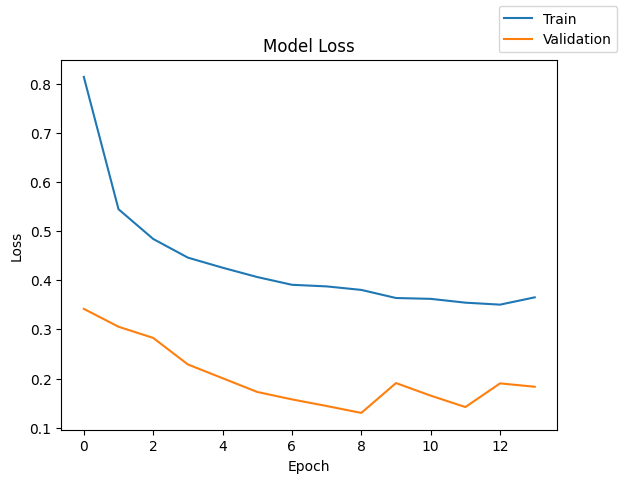

In [401]:
plot(history,'loss')

In [402]:
model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step


2025-07-13 22:49:03.782299: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:49:03.782600: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),


 Best Threshold: 0.74 with F2: 0.889


,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.987102,0.891892,0.987203,0.987149,0.889088


In [403]:
model_1_valid_perf = model_performance_classification(model_1, X_valid, y_valid, threshold=0.74)
model_1_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step


2025-07-13 22:49:10.874968: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:49:10.875524: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.989732,0.918919,0.989853,0.989786,0.914798


* Model has a very high recall which aligns well with our goal.
* There is improvement in the F2 score as well as recall from earlier model.
* Performance metrics on validation dataset are better indicating that model is generalizing well on unseen data.
* F2 score is still less than other metrics indicating potential room for improvement in recall.

#### Model 2

* Let's change the optimizer to Adam
    * This will introduce momentum as well as an adaptive learning rate
* Try a neural network consisting of
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - Adam as the optimizer

In [330]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [331]:
#Initializing the neural network
model_2 = Sequential()
model_2.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_2.add(Dense(7,activation="relu"))
model_2.add(Dense(1,activation="sigmoid"))

model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [332]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model_2.compile(loss='binary_crossentropy', optimizer=optimizer)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Metric to monitor (validation loss)
    patience=5,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

In [333]:
start = time.time()
history = model_2.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, 
                    epochs=epochs,class_weight=cw_dict,callbacks=[early_stopping])
end=time.time()

Epoch 1/25


2025-07-13 22:44:07.307738: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-07-13 22:44:07.308105: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 1.2078 - val_loss: 0.4247
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.7478 - val_loss: 0.3229
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.6257 - val_loss: 0.2831
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.5736 - val_loss: 0.2561
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.5387 - val_loss: 0.2424
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.5119 - val_loss: 0.2287
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.4898 - val_loss: 0.2180
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.4696 - val_loss: 0.2055
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.4495 - val_loss: 0.1979
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.4303 - val_loss: 0.1913
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.4140 - val_loss: 0.1849
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 

In [334]:
print("Time taken in seconds ",end-start)

Time taken in seconds  3.3989670276641846


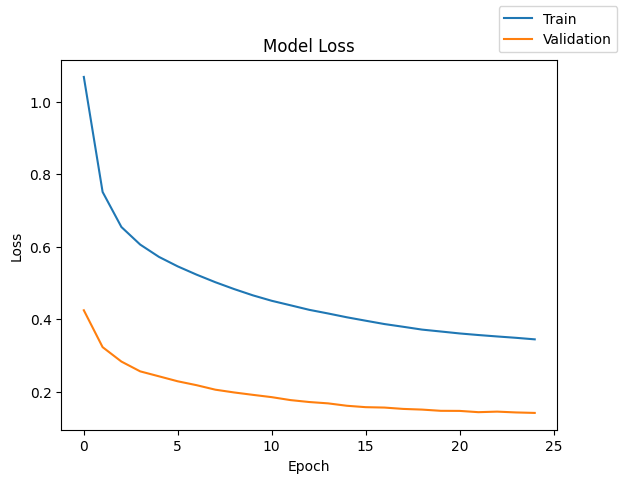

In [335]:
plot(history,'loss')

In [336]:
model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step


2025-07-13 22:44:14.717457: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:44:14.717747: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),


 Best Threshold: 0.73 with F2: 0.890


,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.98754,0.891892,0.987588,0.987563,0.890488


In [337]:
model_2_valid_perf = model_performance_classification(model_2, X_valid, y_valid, threshold=0.73)
model_2_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step


2025-07-13 22:44:21.643994: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:44:21.644334: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.987228,0.896396,0.987374,0.987295,0.892377


* Both training and validation sets show high performance across all metrics, indicating minimal overfitting and consistent generalization.

* The recall and F2 scores are slightly better on the validation set, suggesting the model is slightly more sensitive to positive cases on unseen data.


#### Model 3

* Let's add dropout to regularize the data to see if we can increase the F2 score further

In [346]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [347]:
#Initializing the neural network
model_3 = Sequential()
model_3.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_3.add(Dropout(0.4))
model_3.add(Dense(7,activation="relu"))
model_3.add(Dropout(0.2))
model_3.add(Dense(1,activation="sigmoid"))

model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [348]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model_3.compile(loss='binary_crossentropy', optimizer=optimizer)
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Metric to monitor (validation loss)
    patience=5,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

In [349]:
start = time.time()
history = model_3.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, 
                    epochs=epochs,class_weight=cw_dict,callbacks=[early_stopping])
end=time.time()

Epoch 1/25


2025-07-13 22:44:58.326014: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-07-13 22:44:58.326297: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 1.3117 - val_loss: 0.5315
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.8802 - val_loss: 0.3650
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.7384 - val_loss: 0.2932
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.6907 - val_loss: 0.2670
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.6347 - val_loss: 0.2531
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.6169 - val_loss: 0.2356
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.5884 - val_loss: 0.2118
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.5668 - val_loss: 0.2118
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.5623 - val_loss: 0.2096
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.5618 - val_loss: 0.2029
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.5421 - val_loss: 0.1938
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 

In [350]:
print("Time taken in seconds ",end-start)

Time taken in seconds  3.4238908290863037


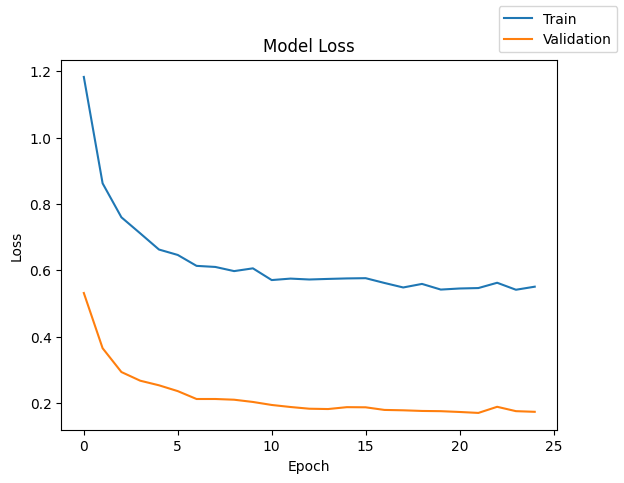

In [351]:
plot(history,'loss')

In [352]:
model_3_train_perf = model_performance_classification(model_3, X_train, y_train)
model_3_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step


2025-07-13 22:45:03.437900: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:45:03.438292: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),


 Best Threshold: 0.52 with F2: 0.865


,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.982343,0.877252,0.983042,0.982631,0.864787


In [353]:
model_3_valid_perf = model_performance_classification(model_3, X_valid, y_valid, threshold=0.52)
model_3_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step


2025-07-13 22:45:09.695291: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:45:09.695532: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.985224,0.887387,0.985541,0.985362,0.88025


* Training metrics slightly dropped across all scores, indicating reduced overfitting due to dropout regularization.

* Validation metrics remain high and comparable to the previous model, though F2 score slightly decreased (~0.89 → ~0.88), suggesting a minor trade-off in recall sensitivity.

* Overall, dropout improved generalization slightly by narrowing the train-validation gap but came at a small cost to F2 score, which may affect recall-focused tasks.

* The model shows steady improvement in both training and validation loss, with no signs of overfitting. Training benefitted from early stop (around epoch 10–15) as further epochs yield minimal gains.

#### Model 4

* Let's add batch normalization to see whether we can stabilize the training process and thereby improve the scores.

In [354]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [355]:
#Initializing the neural network
model_4 = Sequential()
model_4.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_4.add(BatchNormalization())
model_4.add(Dense(7,activation="relu"))
model_4.add(BatchNormalization())
model_4.add(Dense(1,activation="sigmoid"))

model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771 (3.01 KB)

 Trainable params: 729 (2.85 KB)

 Non-trainable params: 42 (168.00 B)

In [356]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model_4.compile(loss='binary_crossentropy', optimizer=optimizer)
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Metric to monitor (validation loss)
    patience=5,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

In [357]:
start = time.time()
history = model_4.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, 
                    epochs=epochs,class_weight=cw_dict,callbacks=[early_stopping])
end=time.time()

Epoch 1/25


2025-07-13 22:45:18.091629: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-07-13 22:45:18.091947: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - loss: 1.2319 - val_loss: 0.4120
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.6718 - val_loss: 0.2665
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.5118 - val_loss: 0.1995
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.4383 - val_loss: 0.1767
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.4058 - val_loss: 0.1634
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.3801 - val_loss: 0.1609
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.3599 - val_loss: 0.1534
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.3475 - val_loss: 0.1530
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.3376 - val_loss: 0.1503
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.3278 - val_loss: 0.1458
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.3220 - val_loss: 0.1477
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 

In [358]:
print("Time taken in seconds ",end-start)

Time taken in seconds  3.8776869773864746


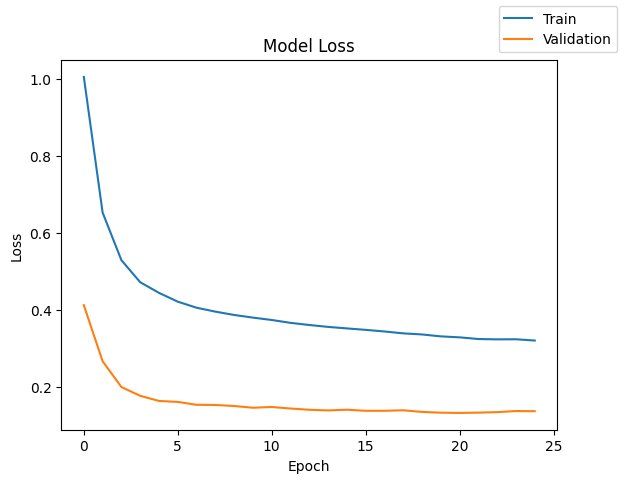

In [359]:
plot(history,'loss')

In [360]:
model_4_train_perf = model_performance_classification(model_4, X_train, y_train)
model_4_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step


2025-07-13 22:45:25.274856: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:45:25.275173: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),


 Best Threshold: 0.77 with F2: 0.892


,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.988917,0.887387,0.988799,0.988849,0.892008


In [361]:
model_4_valid_perf = model_performance_classification(model_4, X_valid, y_valid, threshold=0.77)
model_4_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step


2025-07-13 22:45:30.833148: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:45:30.833466: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.988229,0.90991,0.988427,0.988315,0.904208


* Batch normalization has stabilized the training process, as both training and validation loss curves decrease smoothly without divergence. This indicates improved generalization and reduced risk of overfitting, aligning with the improved metrics observed


* The model achieved high accuracy, recall, precision, and F1/F2 scores, indicating strong classification performance and generalization.

#### Model 5

* Let's add both batchnormalization and dropout.

In [362]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [363]:
#Initializing the neural network
model_5 = Sequential()
model_5.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.4))
model_5.add(Dense(7,activation="relu"))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.2))
model_5.add(Dense(1,activation="sigmoid"))

model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771 (3.01 KB)

 Trainable params: 729 (2.85 KB)

 Non-trainable params: 42 (168.00 B)

In [364]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model_5.compile(loss='binary_crossentropy', optimizer=optimizer)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Metric to monitor (validation loss)
    patience=5,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)


In [365]:
start = time.time()
history = model_5.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, 
                    epochs=epochs,class_weight=cw_dict,callbacks=[early_stopping])
end=time.time()

Epoch 1/25


2025-07-13 22:45:38.605201: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-07-13 22:45:38.605496: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - loss: 1.4112 - val_loss: 0.6078
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 1.0108 - val_loss: 0.4485
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.8606 - val_loss: 0.3670
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.7909 - val_loss: 0.3365
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.7374 - val_loss: 0.2993
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.7335 - val_loss: 0.2759
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.6929 - val_loss: 0.2639
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.6600 - val_loss: 0.2471
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.6340 - val_loss: 0.2338
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.6510 - val_loss: 0.2204
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 0.6274 - val_loss: 0.2240
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 

In [366]:
print("Time taken in seconds ",end-start)

Time taken in seconds  3.964909791946411


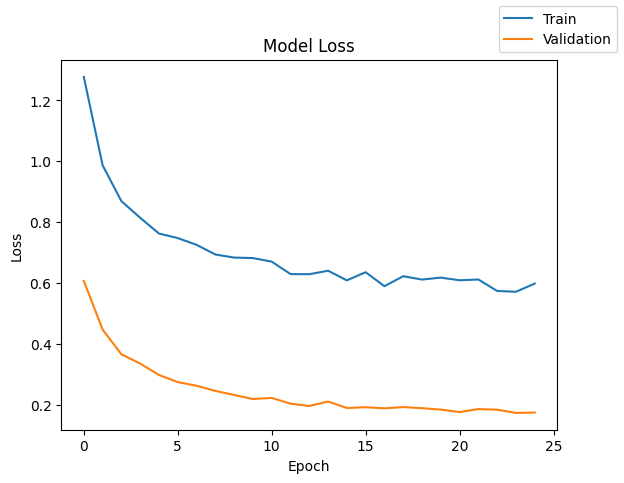

In [367]:
plot(history,'loss')

In [368]:
model_5_train_perf = model_performance_classification(model_5, X_train, y_train)
model_5_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step


2025-07-13 22:45:48.074009: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:45:48.074316: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),


 Best Threshold: 0.74 with F2: 0.866


,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.984973,0.865991,0.984989,0.984981,0.865601


In [369]:
model_5_valid_perf = model_performance_classification(model_5, X_valid, y_valid, threshold=0.74)
model_5_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step


2025-07-13 22:45:54.048310: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:45:54.048740: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.987478,0.882883,0.987427,0.987451,0.884477


* The training and validation loss curves decrease steadily, indicating effective learning and generalization.

* Validation loss stabilizes after around 10 epochs, suggesting the model has reached optimal performance.

* Adding both batch normalization and dropout, f2 score took a hit.

#### Model 6

- Let's initialize the weights using He normal.
- We'll also use only Dropout for regularization.

In [378]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [379]:
#Initializing the neural network
model_6 = Sequential()
model_6.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model_6.add(Dropout(0.4))
model_6.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model_6.add(Dropout(0.2))
model_6.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))
model_6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [380]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model_6.compile(loss='binary_crossentropy', optimizer=optimizer)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Metric to monitor (validation loss)
    patience=5,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

In [381]:
start = time.time()
history = model_6.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, 
                    epochs=epochs,class_weight=cw_dict,callbacks=[early_stopping])
end=time.time()

Epoch 1/25


2025-07-13 22:46:27.390229: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-07-13 22:46:27.390608: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 1.4410 - val_loss: 0.4582
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 1.0615 - val_loss: 0.4093
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.9116 - val_loss: 0.3621
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.8006 - val_loss: 0.3230
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.7636 - val_loss: 0.2841
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.6916 - val_loss: 0.2605
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.6549 - val_loss: 0.2405
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.6718 - val_loss: 0.2397
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 0.6583 - val_loss: 0.2370
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.6374 - val_loss: 0.2214
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.6118 - val_loss: 0.2214
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 

In [382]:
print("Time taken in seconds ",end-start)

Time taken in seconds  3.5025689601898193


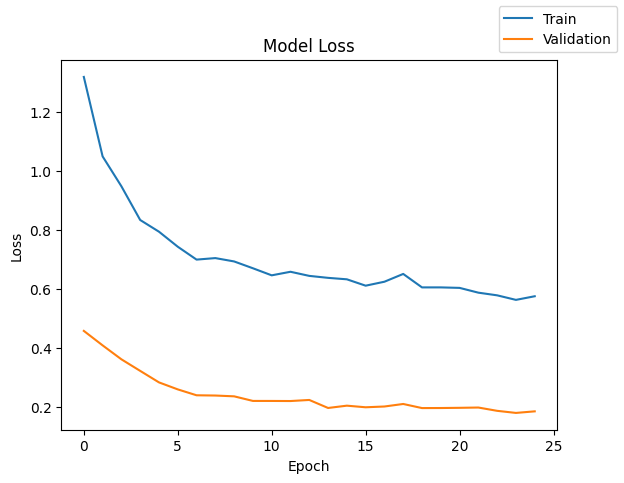

In [383]:
plot(history,'loss')

In [384]:
model_6_train_perf = model_performance_classification(model_6, X_train, y_train)
model_6_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step


2025-07-13 22:46:33.768343: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:46:33.768811: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),


 Best Threshold: 0.56 with F2: 0.865


,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.98372,0.870495,0.984003,0.983848,0.864653


In [385]:
model_6_valid_perf = model_performance_classification(model_6, X_valid, y_valid, threshold=0.56)
model_6_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step


2025-07-13 22:46:41.090436: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:46:41.090747: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,Accuracy,Recall,Precision,F1 Score,F2 Score
0,0.988229,0.882883,0.988117,0.988166,0.886878


* The training and validation loss curves decrease steadily, indicating effective learning and generalization.

* No significant divergence between the curves, suggesting no overfitting.

* F2 score increased slightly, showing improved recall focus while maintaining a balance with precision.


### Model Performance Comparison and Final Model Selection

In [386]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [404]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [405]:
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
Accuracy,0.985599,0.990107,0.987540,0.982343,0.988917,0.984973,0.983720
Recall,0.865991,0.896396,0.891892,0.877252,0.887387,0.865991,0.870495
Precision,0.985540,0.989992,0.987588,0.983042,0.988799,0.984989,0.984003
F1 Score,0.985568,0.990038,0.987563,0.982631,0.988849,0.984981,0.983848
F2 Score,0.867554,0.901676,0.890488,0.864787,0.892008,0.865601,0.864653


In [406]:
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
Accuracy,0.986727,0.989732,0.987228,0.985224,0.988229,0.987478,0.988229
Recall,0.896396,0.918919,0.896396,0.887387,0.909910,0.882883,0.882883
Precision,0.986946,0.989853,0.987374,0.985541,0.988427,0.987427,0.988117
F1 Score,0.986824,0.989786,0.987295,0.985362,0.988315,0.987451,0.988166
F2 Score,0.890779,0.914798,0.892377,0.880250,0.904208,0.884477,0.886878


In [407]:
models_train_comp_df.loc["F2 Score"] - models_valid_comp_df.loc["F2 Score"]

Neural Network (SGD, No Regularization)                      -0.023225
Neural Network (SGD with Momentum, No Regularization)        -0.013122
Neural Network (Adam , No Regularization)                    -0.001889
Neural Network (Adam, dropout [0.4,0.2])                     -0.015463
Neural Network (Adam, Batch Normalization)                   -0.012200
Neural Network (dropout [0.4,0.2], Batch Normalization)      -0.018875
Neural Network (Adam,dropout [0.4,0.2] ,He initialization)   -0.022225
Name: F2 Score, dtype: float64

- Final Model: **Neural Network (SGD with Momentum, No Regularization)**
- Reasoning:
  - Highest validation F2 Score: 0.914798 — directly aligns with your goal of maximizing recall & F2.
  - Minimal overfitting as smallest train-validation F2 gap (-0.013122) ensures better generalization.
  - Balanced Performance as model has High precision, recall(class 1), and F1 across both train and validation sets.


##### Saving weights for best performing model

In [ ]:
# Save the entire model
model_1.save('best_model.keras')

### Final Model

**Neural Network (SGD with Momentum, No Regularization)**

* Neural Network architecture for final model has
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - SGD with momentum(0.9) as the optimizer

In [460]:
# Load the best model
final_model = tf.keras.models.load_model('best_model.keras')

### Final Model run on test data

* Final model is loaded in final_model
* The best threshold selected for model during training was 0.74

In [453]:
y_train_pred = final_model.predict(X_train)
y_valid_pred = final_model.predict(X_valid)
y_test_pred = final_model.predict(X_test_scaled)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step


2025-07-13 22:57:48.686808: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-07-13 22:57:48.687233: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step


In [ ]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>=0.74)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15083
           1       0.90      0.91      0.90       888

    accuracy                           0.99     15971
   macro avg       0.95      0.95      0.95     15971
weighted avg       0.99      0.99      0.99     15971



In [ ]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>=0.74)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3771
           1       0.89      0.90      0.90       222

    accuracy                           0.99      3993
   macro avg       0.94      0.95      0.95      3993
weighted avg       0.99      0.99      0.99      3993



In [ ]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>=0.74)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4718
           1       0.87      0.87      0.87       282

    accuracy                           0.99      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.99      0.99      0.99      5000



**Observations**
* Consistent Class 1 Recall across train (0.91), val (0.90), and test (0.87) indicates strong generalization in detecting failure cases.

* Class 1 Precision is slightly lower than recall, which is acceptable in a recall-optimized use case like predictive maintenance.

* Very high accuracy (~98–99%) and stable class 1 F1-scores (0.87–0.90) confirm that the model balances detection without excessive false positives.

* No sign of overfitting — performance is aligned across all splits.

### Business Insights and Recommendations

**Business Insights**

* The model correctly identifies **87–90% of actual failures**, allowing timely repair, significantly reducing replacement costs. Only ~10–13% of failures go undetected (FN), minimizing the risk of unplanned breakdowns.

* While some false alarms will occur, leading to inspection costs, these are lower than repair or replacement, and are acceptable trade-offs in a **recall-optimized system**.

* Minimal performance drop across datasets suggests **robust generalization** — a critical factor when deployed on live systems with unseen data patterns.

* Given the cost hierarchy (**Replacement > Repair > Inspection**), the model appropriately prioritizes recall (failure capture) even if it slightly increases inspections.


**Recommendations**

* **Deploy the Model for Real-Time Failure Prediction**
    * Integrate the model into ReneWind's live sensor monitoring pipeline to flag turbines at risk of failure.
    * Schedule preventive repairs based on alerts to reduce total cost of ownership (TCO) of turbines.

* **Threshold Tuning for Site-Specific Cost Optimization**
    * Provide flexibility to adjust decision threshold in the model based on real-time cost tradeoffs (e.g., increase recall further in critical locations or seasons).

* **Monitor Class 1 Recall in Production**
    * Set up alerts or dashboards to track recall for failure class (class 1) over time and across locations to ensure sustained effectiveness.

* **Periodically Retrain the Model**
    * Given possible changes in environmental conditions, turbine age, or sensor configurations, plan periodic retraining using new labeled data every 3–6 months.

* **Expand the Feature Understanding**
    * Though features are currently ciphered, collaborating with internal sensor/data teams to understand feature meanings could allow:
        * Feature selection/pruning
        * Model simplification
        * Better explainability (e.g., why a turbine is flagged)

* **Introduce Cost-Aware Maintenance Policies**
    * Use model outputs to develop tiered maintenance actions:
        * High-risk turbines → repair
        * Medium-risk → inspect
        * Low-risk → monitor